# Modelos biofísicos unidimensionales: INapL

En esta ocasión daremos un paso en dirección a los modelos basos en conductancias, que están más cerca de la fisiología en términos de la representación de la neurona como circuito RC. Observaremos los comportamientos que surgen de considerar variable a la conductancia de la corriente de sodio, y en qué sentido se parece a alguno de los modelos IF discutidos en el tema anterior.

In [1]:
# Cargamos la paquetería

import numpy as np
import matplotlib.pyplot as plt
from numpy.core.function_base import linspace

from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from numpy import sqrt, exp, sin, cos

In [2]:
# Línea fase

def phase(f,x):
    
    phasep = plt.figure(figsize=(12,6))
    phasep = plt.plot(x,f(x),color="magenta")

    for k in range(len(x)):

        if f(x[k])<-0.01:

            phasep = plt.quiver(x[k],0.0,f(x[k]),0.0,color="blue")

        elif f(x[k])>0.01:

            phasep = plt.quiver(x[k],0.0,f(x[k]),0.0,color="red")

        else:

            phasep = plt.scatter([x[k]],[0.0],color="black",s=100.0)

    return phasep

# Función auxiliar de graficación

def graph(t,f):
    
    y = np.zeros(len(t))
    
    for k in range(len(t)):
        y[k] = f(t[k])
        
    return y

La conclusión del tema anterior es que los modelos 1D subumbrales no pueden exhibir potenciales de acción ni comportamientos oscilatorios de manera autónoma, es decir, sin estímulos que varíen con el tiempo (como los esquemas IF o las corrientes no-constantes). Un paso intermedio entre este paradigma y la versión más completa de los modelos basados en conductancia, como Hodgkin-Huxley, es incorporar las variaciones de la permeabilidad de la membrana neuronal dentro de nuestros modelos mediante las conductancias.

El primer modelo que veremos se basa en la idea de conductancias variables, esto es, que la densidad de las corrientes iónicas varía con el tiempo. De manera general se supone que las conductancias de una corriente se ven de la forma

$$g_i=\bar{g}_im_i^{a_i}h_i^{b_i},$$

donde $g_i$ es la conductancia (total) de la corriente iónica, $\bar{g}_i$ es la conductancia *maximal* 
de la corriente, $m_i$ es una variable de activación, $h_i$ es una variable de inactivación, que en conjunto representan la proporción de canales abiertos, y $a_i$ y $b_i$ representan el número de compuertas de activación e inactivación, respectivamente. En este momento suponemos que los canales están regulados por voltaje (*voltage-gated*), por lo que las activaciones e inactivaciones son dependientes de $V$. Si un canal no tiene compuertas de inactivación ($b=0$) decimos que la corriente asociada es *persistente*. En caso contrario, decimos que es *transitoria*.

Por el momento estudiaremos corrientes persistentes, así que la conductancia se reduce a

$$g_i = \bar{g}_im_i^{a_i}.$$

Un valor $m_i=1$ quiere decir que la conductancia alcanza su valor máximo, por lo que la corriente está completamente *activada*. Por su parte, valores $0<m_i<1$ implican que la corriente está parcialmente activada, mientras que $m_i=0$ reduce la conductancia a $g_i=0$, y se dice que la corriente está *desactivada*. 

Cuando una corriente no contempla compuertas de activación ($a_i=0$) ni inactivación ($b_i=0$) se concluye que la conductancia se mantiene constante a lo largo del tiempo, $g_i=\bar{g}_i$. Estas corrientes son denominadas *óhmicas*, o *de fuga*, y su papel es ayudar al potencial de membrana a alcanzar el reposo.

## Modelo de sodio persistente

Consideremos el modelo

$$C\dot{V}=I-g_L(V-E_L)-\bar{g}_{Na}m_{\infty}(V)(V-E_{Na}),$$

donde $I_L=g_L(V-E_L)$ es una corriente de fuga, y $I_{Na}=\bar{g}_{Na}m_{\infty}(V)(V-E_{Na})$ es una corriente persistente de sodio de activación instantánea, con función de activación

$$m_{\infty}(V)=\dfrac{1}{1+\exp\left(\tfrac{V_{1/2}-V}{\Delta}\right)},$$

que es una función tipo-Boltzmann, donde $V_{1/2}$ es la activación media de la corriente, y $\Delta$ es la pendiente de la activación en $V=0$. Por todas estas características, a este modelo se le conoce como el **modelo de sodio persistente de activación instantánea con fuga**, o $I_{Na_p,L}$.

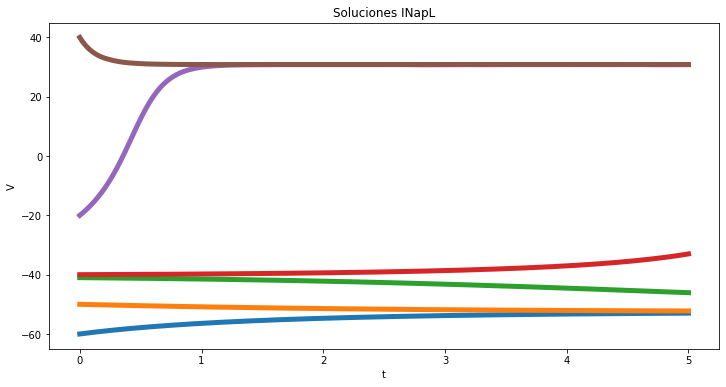

In [4]:
### Capacidad eléctrica

C = 10.0

### Conductancias maximales

gNa = 74.0
gL = 19.0

### Potenciales de reversión

ENa = 60.0
EL = -67.0

### Parámetros de la activación instantánea

Vh = 1.5
Del = 16.0

### Función de activación instantánea

def minf(V):
    return 1/(1+exp((Vh-V)/Del))

### Corriente aplicada

I1 = 0.0

def Iapp(t):
    return I1

### Campo vectorial

def INapL_app(t,V):
    return (Iapp(t)-gL*(V-EL)-gNa*minf(V)*(V-ENa))/C

### Integración numérica. Seis soluciones.

t = linspace(0,5,501)
V0 = [-60.0,-50.0,-41.0,-40.0,-20.0,40.0]
sol = solve_ivp(INapL_app, [0, 5], V0, dense_output=True)
u = sol.sol(t)

p = plt.figure(figsize=(12,6))
p = plt.xlabel('t')
p = plt.ylabel('V')
p = plt.title("Soluciones INapL")

p = plt.plot(t,u[0,:],linewidth=5.0)
p = plt.plot(t,u[1,:],linewidth=5.0)
p = plt.plot(t,u[2,:],linewidth=5.0)
p = plt.plot(t,u[3,:],linewidth=5.0)
p = plt.plot(t,u[4,:],linewidth=5.0)
p = plt.plot(t,u[5,:],linewidth=5.0)

Con las soluciones anteriores podemos suponer la existencia de dos puntos de equilibrio estables, uno más despolarizado que el otro, así como un punto inestable. Verifiquemos esto mediante la gráfica del campo vectorial y mediante la línea fase.

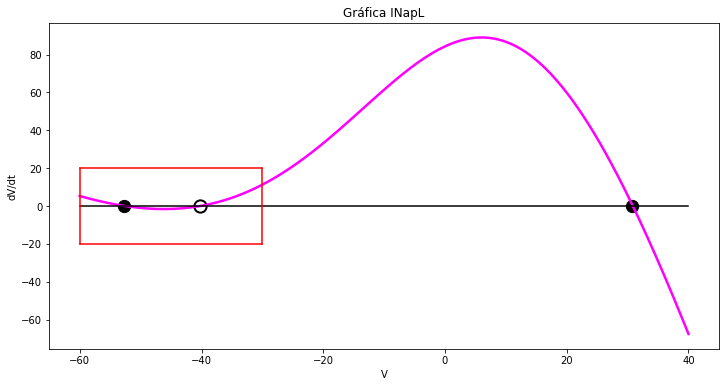

In [5]:
### Gráfica del campo vectorial

I1 = 0.0

def INapL_phase(V):
    return (I1-gL*(V-EL)-gNa*minf(V)*(V-ENa))/C

V = linspace(-60,40,10001)

p = plt.figure(figsize=(12,6))
p = plt.plot(V,INapL_phase(V),linewidth=2.5,color="magenta")
p = plt.plot([-60,40],[0,0],color="black")
p = plt.scatter([-40.3],[0.0],s=150,color="white",edgecolors="black", linewidth=2.0,alpha=1.0)
p = plt.scatter([-52.8,30.8],[0.0,0.0],s=150,color="black")

p = plt.plot([-60,-30],[-20,-20],color="red")
p = plt.plot([-60,-30],[20,20],color="red")
p = plt.plot([-30,-30],[-20,20],color="red")
p = plt.plot([-60,-60],[-20,20],color="red")

p = plt.xlabel('V')
p = plt.ylabel('dV/dt')
p = plt.title("Gráfica INapL")

En negro marcamos los puntos de equilibrio estables, mientras que en blanco marcamos el punto inestable. Esto es consistente con las soluciones de la gráfica anterior.

En el recuadro rojo podemos observar una pequeña equivalencia dinámica entre el modelo $I_{Na_p,L}$ y el modelo QIF, versión subumbral.

Aunque no tenemos una expresión concreta para los ceros del campo vectorial, podemos estimarlos gráficamente y verificar su estabilidad mediante el criterio discutido.

In [14]:
def dINapL(V):
    return 1/C*(-gL-gNa*minf(V)-gNa/Del*exp((Vh-V)/Del)/(1+exp((Vh-V)/Del))**2)

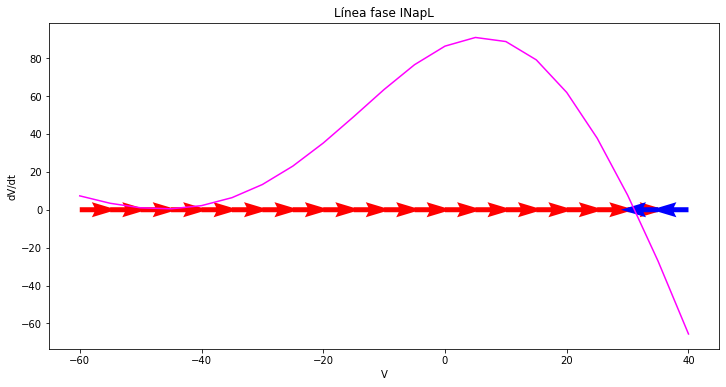

In [6]:
### Línea fase

I1 = 20.0

def INapL_phase(V):
    return (I1-gL*(V-EL)-gNa*minf(V)*(V-ENa))/C

V0 = linspace(-60,40,21)

pphase = phase(INapL_phase,V0)

p = plt.xlabel('V')
p = plt.ylabel('dV/dt')
p = plt.title("Línea fase INapL")

¿Qué ocurre si incrementamos la corriente aplicada? Geométricamente esto querría decir que *subimos* la gráfica del campo vectorial, lo que podría implicar que solo se cruce una vez (en lugar de tres) al eje $X$. Esto reduce el número de puntos de equilibrio de tres a uno, y se da convergencia global al estado despolarizado.

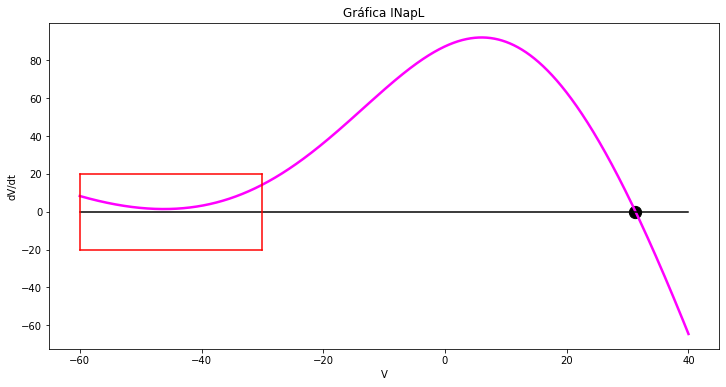

In [16]:
### Gráfica del campo vectorial

I1 = 30.0

def INapL_phase(V):
    return (I1-gL*(V-EL)-gNa*minf(V)*(V-ENa))/C

V = linspace(-60,40,10001)

p = plt.figure(figsize=(12,6))
p = plt.plot(V,INapL_phase(V),linewidth=2.5,color="magenta")
p = plt.plot([-60,40],[0,0],color="black")
# p = plt.scatter([-40.3],[0.0],s=150,color="white",edgecolors="black", linewidth=2.0,alpha=1.0)
p = plt.scatter([31.2],[0.0],s=150,color="black")

p = plt.plot([-60,-30],[-20,-20],color="red")
p = plt.plot([-60,-30],[20,20],color="red")
p = plt.plot([-30,-30],[-20,20],color="red")
p = plt.plot([-60,-60],[-20,20],color="red")

p = plt.xlabel('V')
p = plt.ylabel('dV/dt')
p = plt.title("Gráfica INapL")

In [ ]:
### Línea fase

V0 = linspace(-60,40,21)

pphase = phase(INapL_phase,V0)
pphase = plt.xlabel('V')
pphase = plt.ylabel('dV/dt')
pphase = plt.title("Línea fase INapL")

En esta última gráfica vemos cómo podemos *switchear* el potencial de membrana del reposo hiperpolarizado al reposo despolarizado por una corriente *instantánea* suficientemente grande. Se puede observar que el *switcheo* contrario es más complicado, pero teóricamente posible, dada la despolarización de la membrana. En este sentido, la separatriz actúa como un *umbral* para el sistema.

Text(0, 0.5, 'I')

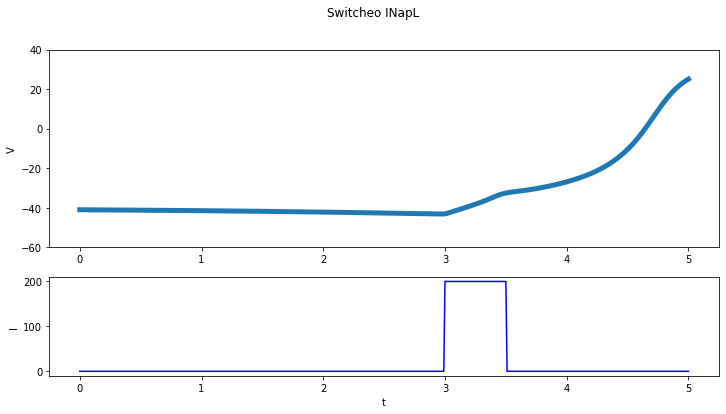

In [17]:
def Iapp(t):
    return 200*(t>=3 and t<=3.5)

def INapL_app(t,V):
    return (Iapp(t)-gL*(V-EL)-gNa*minf(V)*(V-ENa))/C

### Integración numérica. Seis soluciones.

t = linspace(0,5,501)
V0 = [-41.0]
sol = solve_ivp(INapL_app, [0, 5], V0, dense_output=True)
u = sol.sol(t)

fig, axs = plt.subplots(2,1,figsize=(12,6), gridspec_kw={'height_ratios': [2,1]})
fig.suptitle("Switcheo INapL")

axs[0].set_ylabel('V')
axs[0].set_ylim([-60,40])

axs[0].plot(t,u[0,:],linewidth=5.0)

axs[1].plot(t,graph(t,Iapp),color="blue")
axs[1].set_xlabel('t')
axs[1].set_ylabel('I')


## Modelo FitzHugh-Nagumo (recuperación instantánea, o 1D)

El modelo de FitzHugh-Nagumo (1955, y 1961 por su planteamiento como circuito equivalente) surge como una reducción geométrica del modelo de Hodgkin-Huxley, es decir que busca capturar la parte esencial de la evolución de membrana sin prestar atención a las particularidades de la escala o de la estructura matemática. Lo relevante es la similitud con que el potencial de membrana evoluciona: la ausencia o existencia de equilibrios y de umbrales, de manera cualitativa más que cuantitativa.

En esta ocasión solo estudiaremos la versión *unidimensional* del modelo (en contraste con el planteamiento original de FitzHugh, que analizaremos más adelante). Este modelo toma la forma

$$\dot{V}=\beta V-\dfrac{V^3}{3}+I,$$

donde $\beta$ es un parámetro de pendiente, e $I$ es la corriente aplicada. Como veremos a continuación, la evolución del modelo FHN(1D) y del modelo $I_{Na_p,L}$ es esencialmente la misma, tomando como punto de comparación la forma de la gráfica de los campos vectoriales (nuevamente, ignorando la escala).

Text(0, 0.5, 'I')

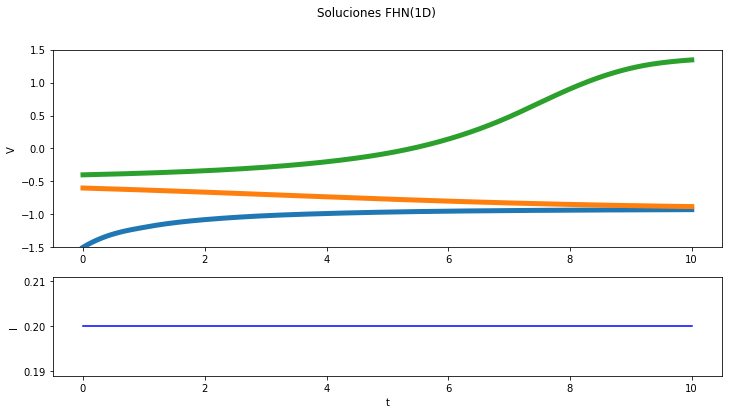

In [3]:
### Parámetros

beta = 0.5
I1 = 0.2

### Corriente aplicada

def Iapp(t):
    return I1

### Campo vectorial

def FHN_app(t,V):
    return beta*V-V**3/3+Iapp(t)

### Integración numérica. Tres soluciones.

t = linspace(0,10,501)
V0 = [-1.5,-0.6,-0.4]
sol = solve_ivp(FHN_app, [0, 10], V0, dense_output=True)
u = sol.sol(t)

fig, axs = plt.subplots(2,1,figsize=(12,6), gridspec_kw={'height_ratios': [2,1]})
fig.suptitle("Soluciones FHN(1D)")

axs[0].set_ylabel('V')
axs[0].set_ylim([-1.5,1.5])

axs[0].plot(t,u[0,:],linewidth=5.0)
axs[0].plot(t,u[1,:],linewidth=5.0)
axs[0].plot(t,u[2,:],linewidth=5.0)

axs[1].plot(t,graph(t,Iapp),color="blue")
axs[1].set_xlabel('t')
axs[1].set_ylabel('I')

A continuación veremos lo que ocurre con el potencial de membrana al tomar distintos valores constantes de corriente aplicada. Como en el caso anterior notaremos una pérdida y ganancia de puntos de equilibrio, y el nacimiento de reposos despolarizados o hiperpolarizados.

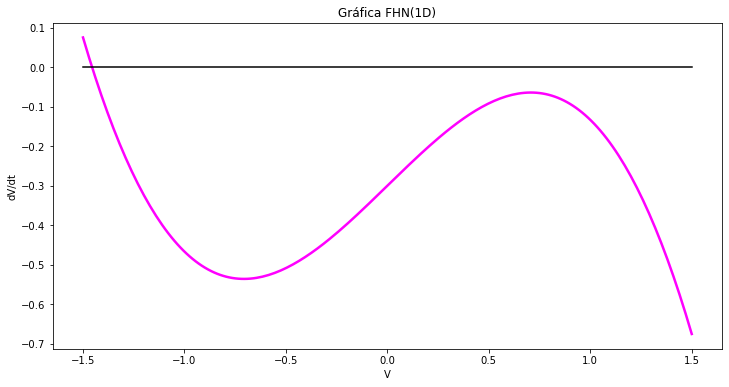

In [11]:
I1 = -0.3
# I1 = 0.3
# I1 = 0.25

def FHN_phase(V):
    return beta*V-V**3/3+I1

V = linspace(-1.5,1.5,201)

p = plt.figure(figsize = (12,6))
p = plt.plot(V,FHN_phase(V), color="magenta", linewidth=2.5)
p = plt.plot([-1.5,1.5],[0.0,0.0],color="black")

# p = plt.scatter([-0.47],[0.0],s=150,color="white",edgecolors="black", linewidth=2.0,alpha=1.0)
# p = plt.scatter([-0.92,1.385],[0.0,0.0],s=150,color="black")

# p = plt.plot([-1.0,-0.3],[-0.1,-0.1],color="red")
# p = plt.plot([-1.0,-0.3],[0.1,0.1],color="red")
# p = plt.plot([-1.0,-1.0],[-0.1,0.1],color="red")
# p = plt.plot([-0.3,-0.3],[-0.1,0.1],color="red")


p = plt.title("Gráfica FHN(1D)")
p = plt.xlabel("V")
p = plt.ylabel("dV/dt")

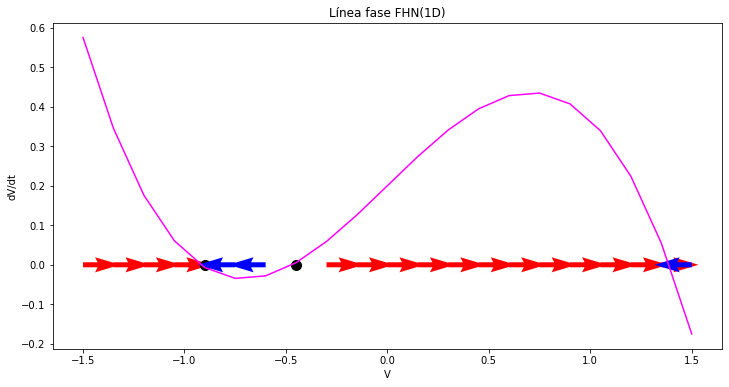

In [5]:
ZV0 = linspace(-1.5,1.5,21)

pphase = phase(FHN_phase,V0)
pphase = plt.title("Línea fase FHN(1D)")
pphase = plt.xlabel("V")
pphase = plt.ylabel("dV/dt")

También podemos replicar el fenómeno de *switcheo* de manera ligeramente más sencilla, pues la escala reducida del potencial de membrana implica una reducción de la corriente necesaria para hiperpolarizar cualitativamente a la neurona. Nuevamente, el punto inestable alrededor de $-0.5$ es un umbral que divide las condiciones iniciales que convergen al estado hiperpolarizado y al despolarizado

Text(0, 0.5, 'I')

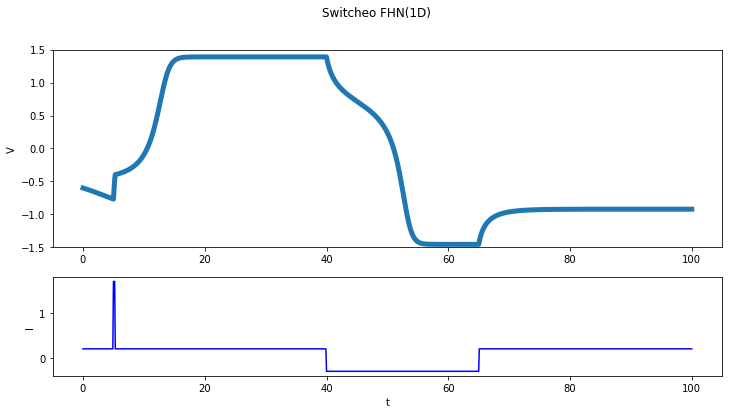

In [19]:
beta = 0.5

def Iapp(t):
    return 0.2+1.5*(t>=5.0 and t<=5.25)+(-0.5)*(t>=40.0 and t<=65.0)

def FHN_app(V,t):
    return beta*V-V**3/3+Iapp(t)

### Integración numérica. Tres soluciones.

t = linspace(0,100,1001)
V0 = -0.6
u = odeint(FHN_app,V0,t)

fig, axs = plt.subplots(2,1,figsize=(12,6), gridspec_kw={'height_ratios': [2,1]})
fig.suptitle("Switcheo FHN(1D)")

axs[0].set_ylabel('V')
axs[0].set_ylim([-1.5,1.5])

axs[0].plot(t,u[:,0],linewidth=5.0)

axs[1].plot(t,graph(t,Iapp),color="blue")
axs[1].set_xlabel('t')
axs[1].set_ylabel('I')    